In [1]:
"""Build a predictive linear regression model for given dataset, given temperature, humidity, wind speed , 
wind bearing, visibility, pressure  predict apparent temperature"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('weatherHistory.csv')
data.drop(['Formatted Date','Summary','Precip Type','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Daily Summary'],axis=1,inplace=True)
data['x0']=np.ones((len(data),1))
data=data.reindex(columns=sorted(data.columns))

In [3]:
Training_data=int(0.70*len(data))
Train_data=data.iloc[0:Training_data,:]
Test_data=data.iloc[Training_data:,:]

x_train,y_train,x_test,y_test=Train_data.iloc[:,1:],Train_data.iloc[:,0:1],Test_data.iloc[:,1:],Test_data.iloc[:,0:1]

In [4]:
inverse=np.linalg.inv(np.dot(x_train.T.values,x_train.values))
product=np.dot(inverse,x_train.T.values)
theta=np.dot(product,y_train)

In [5]:
Y_prediction=np.dot(x_test.values,theta)

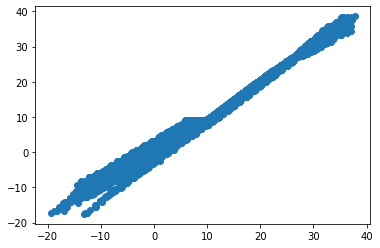

In [6]:
plt.scatter(y_test,Y_prediction)
#plt.plot(y_test,Y_prediction,'r')
plt.show()

In [10]:
mse=np.mean((y_test-Y_prediction)**2)
mse

Apparent Temperature (C)    1.227328
dtype: float64

In [11]:
rmse= np.sqrt(mse)
rmse

Apparent Temperature (C)    1.107848
dtype: float64

In [12]:
mae=np.mean(abs(y_test-Y_prediction))
mae

Apparent Temperature (C)    0.852048
dtype: float64